Student: Diana Marcela Lizarazo Caicedo Code: 855963

# Final Project - BDM 2053-Big Data Algorithms and Statistics

### Table of Contents:
1. Introduction
2. Data
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Training and Evaluating Models
    1. Dimensional Reduction (PCA)
6. Conclusion

## 1. Introduction

This project is based on the Mobile prices dataset taken from Kaggle, this dataset contains several factors among which we find the brand, size, weight, image quality, RAM, battery, etc. that interfere in the sales price of a Mobile.  With this data set, I want to estimate a price range that indicates how high the price is in relation to the mentioned features. For these we will apply the logistic regression and KNeighbors Classifier models.

## 2. Data 

This dataset contains all the information related to different characteristics that interfere with the prices of a Mobile, such as:

- **battery_power:** Total energy a battery can store in one time measured in mAh
- **blue:** Has bluetooth or not
- **clock_speed:** speed at which microprocessor executes instructions
- **dual_sim:** Has dual sim support or not
- **fc:** Front Camera mega pixels
- **four_g:** Has 4G or not
- **int_memory:** Internal Memory in Gigabytes
- **m_dep:** Mobile Depth in cm
- **mobile_wt:** Weight of mobile phone
- **n_cores:** Number of cores of processor
- **pc:** Primary Camera mega pixels
- **px_height:** Pixel Resolution Height
- **px_width:** Pixel Resolution Width
- **ram:** Random Access Memory in Mega Bytes
- **sc_h:** Screen Height of mobile in cm
- **sc_w:** Screen Width of mobile in cm
- **talk_time:** longest time that a single battery charge will last when you are
- **three_g:** Has 3G or not
- **touch_screen:** Has touch screen or not
- **wifi:** Has wifi or not
- **price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

**First I am going to import all the libraries that I will use in the project and open the dataset:**

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# 3. Exploratory Data Analysis (EDA)

In [60]:
data=pd.read_csv('mobile_prices.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [61]:
data.shape
print('The dataset has {} instances (rows) and {} features (columns).'.format(data.shape[0],data.shape[1]))

The dataset has 2000 instances (rows) and 21 features (columns).


**With the following code I want to identify if the dataset has null values. In addition, I want to identify the data types that the dataset has:**

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**The dataset has no null values, so I don't need to do the imputation. Also, the dataset has 19 integer data and 2 float data. Since we do not have categorical data, it is not necessary to encode our variables.**

**With the following code I want to see the main statistical data of the dataset:**

In [63]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**With the following code I want which data contain integer values and which have floating data values:**

In [64]:
data_categorical=data.select_dtypes(include='int64')
data_categorical.head()

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [65]:
data_categorical=data.select_dtypes(include='float64')
data_categorical.head()

,clock_speed,m_dep
0,2.2,0.6
1,0.5,0.7
2,0.5,0.9
3,2.5,0.8
4,1.2,0.6


**The following graph shows the participation by price range:**

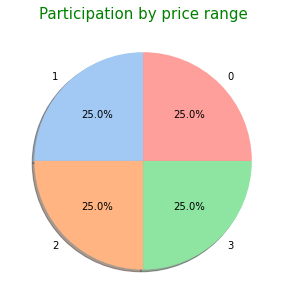

In [66]:
labels = data["price_range"].value_counts().index
sizes = data["price_range"].value_counts()
colors = sns.color_palette('pastel')[0:10]
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('Participation by price range',color = 'green',fontsize = 15)
plt.show()

**With the following graph we can see the participation by price range and by mobile features:**

In [67]:
pd.DataFrame(data = [data.groupby('price_range')['blue'].value_counts(), 
                     data.groupby('price_range')['dual_sim'].value_counts(),
                     data.groupby('price_range')['four_g'].value_counts(),
                     data.groupby('price_range')['three_g'].value_counts(),
                     data.groupby('price_range')['touch_screen'].value_counts(),
                     data.groupby('price_range')['wifi'].value_counts()],  

             index=["blue", "dual_sim","four_g","Three_g","touch_screen","wifi"]).T.style.background_gradient(cmap='coolwarm')

**The following graph shows the distribution for each feature of the dataset:**

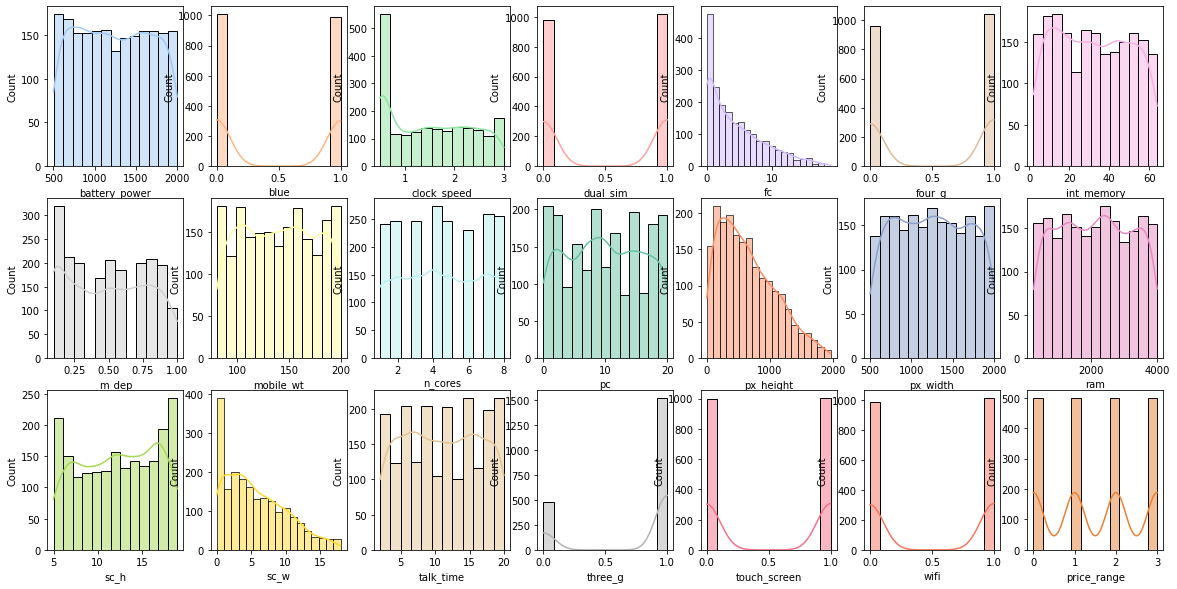

In [68]:
fig, axes = plt.subplots(3, 7,figsize=(20,10))
axe = axes.flatten()
color_palette = sns.color_palette("pastel") + sns.color_palette("Set2") + sns.color_palette("husl", 25)


for i,feature in enumerate(data.columns):
    sns.histplot(data=data, x=feature, kde=True, ax=axe[i], color=color_palette[i])    
plt.show()

**The following graph shows the boxplot for each feature of the dataset:**

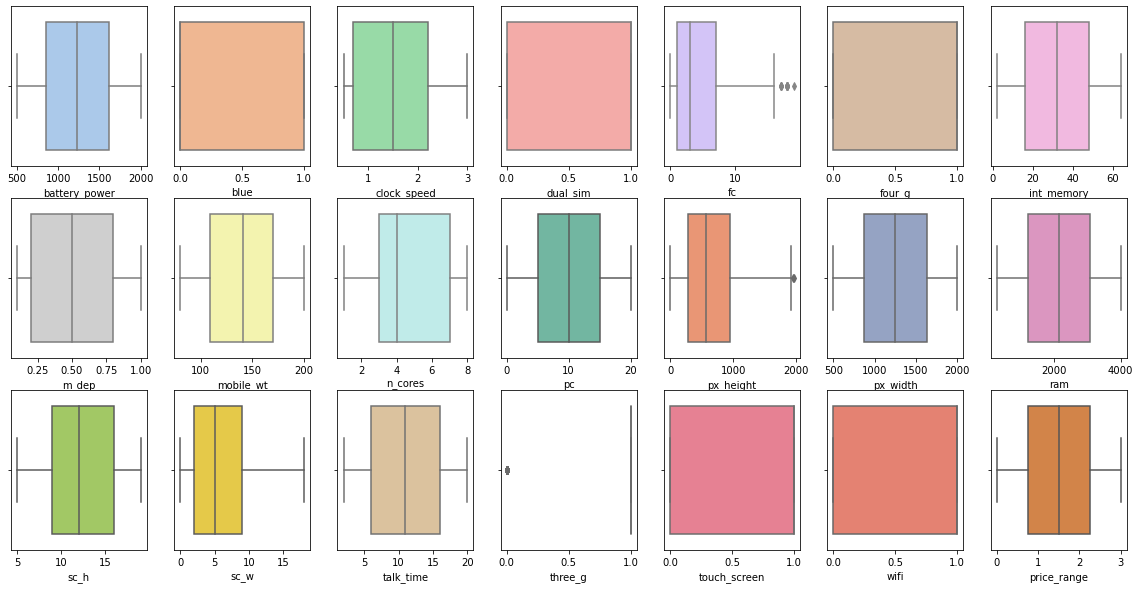

In [69]:
fig, axes = plt.subplots(3, 7,figsize=(20,10))
axe = axes.flatten()

for i,feature in enumerate(data.columns):
    sns.boxplot(data=data, x=feature, ax=axe[i], color=color_palette[i])    
plt.show()

# 4. Feature Engineering

Once we have analyzed the information in our dataset, we proceed to prepare the data to apply the prediction models.

In [70]:
data[data.duplicated()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


**I haven't duplicate values in the data set. Now we gonna see the relation with the target variable:**

In [71]:
data.corr()["price_range"].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

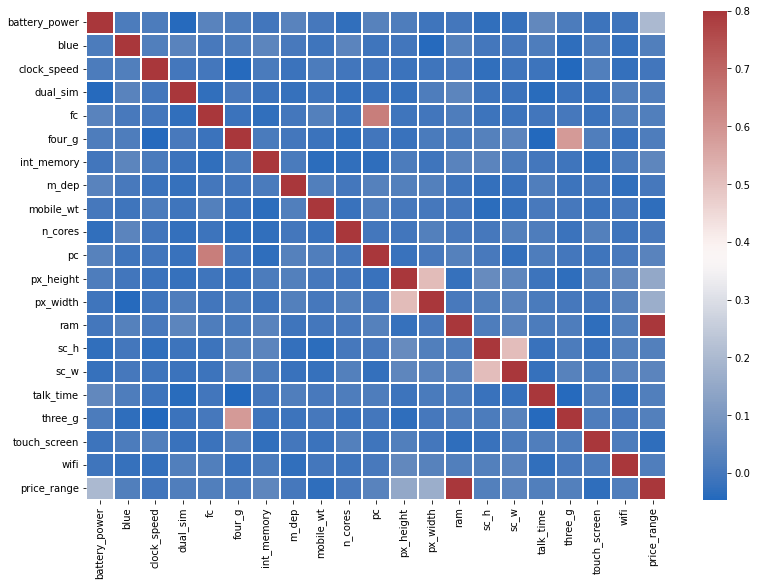

In [72]:
plt.figure(figsize=(13,9))
sns.heatmap(data.corr(), vmax=0.8, linewidth=0.1, cmap='vlag')
plt.show()

**Price appears to be highly correlated with RAM. In addition, clock_speed, mobile_wt and touch_screen appear to be negatively correlated, indicating that there is a relationship between them, such that as the value of one variable increases, the value of the other decreases.**

# 5. Training and Evaluating Models

In [73]:
X = data.drop('price_range',axis=1)
y = data['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1500, 20) (1500,) (500, 20) (500,)


**Train and Fit Models**

In [74]:
Model1 = LogisticRegression()
Model1.fit(X_train, y_train)
predicts1 = Model1.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression

Accuracy test:  61.6

classification report

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       132
           1       0.49      0.50      0.49       118
           2       0.50      0.49      0.50       120
           3       0.67      0.73      0.70       130

    accuracy                           0.62       500
   macro avg       0.61      0.61      0.61       500
weighted avg       0.62      0.62      0.62       500

Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

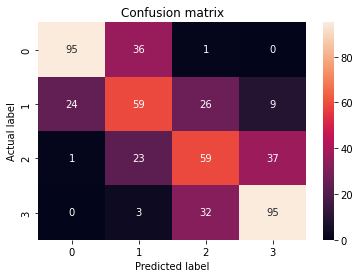

In [75]:
print("Logistic Regression")
Model1_acc = accuracy_score(y_test, predicts1)*100

print("\nAccuracy test: ", round(Model1_acc,2))

print("\nclassification report\n")
report1 = classification_report(y_test, predicts1)
print(report1)

print("Confusion Matrix")
confusionmatrix1 = confusion_matrix(y_test, predicts1)
p = sns.heatmap(pd.DataFrame(confusionmatrix1), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [76]:
Model2 = KNeighborsClassifier()
Model2.fit(X_train, y_train)
predicts2 = Model2.predict(X_test)

KNeighbors Classifier_ Metrics

Accuracy test:  93.2

classification report

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       132
           1       0.89      0.93      0.91       118
           2       0.92      0.89      0.91       120
           3       0.96      0.95      0.95       130

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500

Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

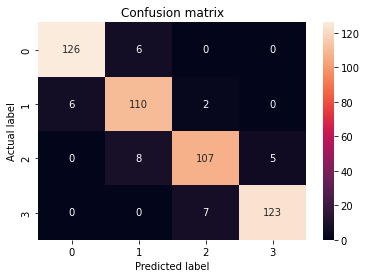

In [77]:
print("KNeighbors Classifier_ Metrics")
Model2_acc = accuracy_score(y_test, predicts2)*100

print("\nAccuracy test: ", round(Model2_acc,2))

print("\nclassification report\n")
report2 = classification_report(y_test, predicts2)
print(report2)

print("Confusion Matrix")
confusionmatrix2 = confusion_matrix(y_test, predicts2)
p = sns.heatmap(pd.DataFrame(confusionmatrix2), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Dimensional Reduction** (Principal Component Analysis: PCA)

In [78]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents, columns=['Component1','Component2'])
print('\nThe Importance of each column is explained by %: ',pca.explained_variance_ratio_)
finaldata=principalDf.join(data['price_range'])
print('\nFinal DataFrame')
finaldata.head()


The Importance of each column is explained by %:  [0.67043953 0.16517904]

Final DataFrame


,Component1,Component2,price_range
0,430.596294,-795.788745,1
1,504.985048,696.622162,2
2,473.330120,763.941758,2
3,639.822549,779.690737,2
4,-718.985233,382.304896,1


In [79]:
X = finaldata.drop('price_range',axis=1)
y = finaldata['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [80]:
Model1_pca = LogisticRegression()
Model1_pca.fit(X_train, y_train)
predicts1_pca = Model1_pca.predict(X_test)

Logistic Regression_PCA

Accuracy test:  80.6

classification report

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       132
           1       0.75      0.74      0.74       118
           2       0.72      0.74      0.73       120
           3       0.87      0.85      0.86       130

    accuracy                           0.81       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.81      0.81      0.81       500


Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

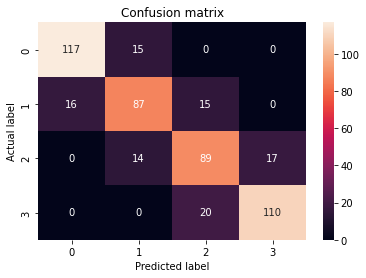

In [81]:
print("Logistic Regression_PCA")
Model1_pca_acc = accuracy_score(y_test, predicts1_pca)*100

print("\nAccuracy test: ", round(Model1_pca_acc,2))

print("\nclassification report\n")
report3 = classification_report(y_test, predicts1_pca)
print(report3)

print("\nConfusion Matrix")
confusionmatrix3 = confusion_matrix(y_test, predicts1_pca)
p = sns.heatmap(pd.DataFrame(confusionmatrix3), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
Model2_pca = KNeighborsClassifier()
Model2_pca.fit(X_train, y_train)
predicts2_pca = Model2_pca.predict(X_test)

KNN_PCA

Accuracy test:  80.0

classification report

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       132
           1       0.71      0.75      0.73       118
           2       0.71      0.71      0.71       120
           3       0.86      0.87      0.87       130

    accuracy                           0.80       500
   macro avg       0.80      0.80      0.80       500
weighted avg       0.80      0.80      0.80       500


Confusion Matrix


Text(0.5, 15.0, 'Predicted label')

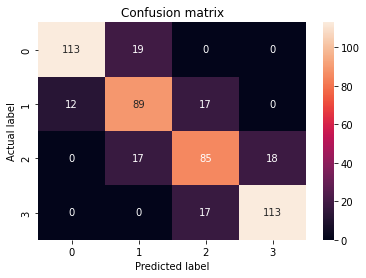

In [83]:
print("KNN_PCA\n")
Model2_pca_acc = accuracy_score(y_test, predicts2_pca)*100
print("Accuracy test: ", round(Model2_pca_acc,2))

print("\nclassification report\n")
report4 = classification_report(y_test, predicts2_pca)
print(report4)

print("\nConfusion Matrix")
confusionmatrix4 = confusion_matrix(y_test, predicts2_pca)
p = sns.heatmap(pd.DataFrame(confusionmatrix4), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# 6. Conclusion

In [84]:
conclusion = pd.DataFrame({
    'Model': ['Logistic Regression','Logistic Regression_PCA', 'KNeighbors Classifier', 'KNeighbors Classifier_PCA'],
    'Accuracy': [Model1_acc,Model1_pca_acc,Model2_acc,Model2_pca_acc,]})

conclusion.head()

,Model,Accuracy
0,Logistic Regression,61.6
1,Logistic Regression_PCA,80.6
2,KNeighbors Classifier,93.2
3,KNeighbors Classifier_PCA,80.0


The Mobile prices dataset is a dataset to which the logistic regression and KNeighbors Classifier models were applied. It uses PCA; however, from the table above it is clear that this technique does not benefit the KNN model, as it reduces the accuracy, and logistic regression increases it; however, it is not as high as the accuracy for the KNN model without PCA. In conclusion, the model that best fits the data set and has a higher accuracy is the KNN model without applying the PCA technique.